In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
from core.models import MNISTDense
from core.initializers import He, Xavier
from core.optimizers import GradDesc, Momentum, Adagrad, RMSProp, Adam
from core.losses import Crossentropy
from core.activations import ReLu, Softmax

## Считывание данных из бинарных файлов

In [3]:
project_path =  Path.cwd().parent
data_path = project_path / "data"
preproc_path = data_path / "preprocessed"

source_train_im_path = preproc_path / "train-images-idx3-ubyte.bin"
source_train_l_path = preproc_path / "train-labels-idx1-ubyte.bin"
source_test_im_path = preproc_path / "t10k-images-idx3-ubyte.bin"
source_test_l_path = preproc_path / "t10k-labels-idx1-ubyte.bin"


### Обучающая выборка

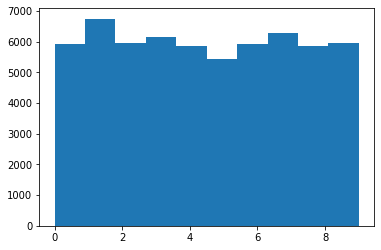

In [4]:
# Метки обуающей выборки
train_labels = np.fromfile(source_train_l_path, dtype=np.uint8, offset=8)
plt.hist(train_labels);

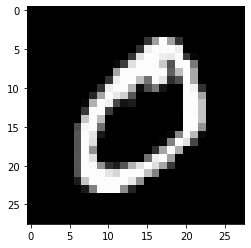

In [5]:
# Изображения обучающей выборки
train_size, rows, columns = 60000, 28, 28
train_images = np.fromfile(source_train_im_path, dtype=np.uint8, offset=16).reshape((train_size, rows, columns))
plt.imshow(train_images[1,:,:], cmap='gray')

### Тестовая выборка

In [6]:
# Метки тестовой выборки
# test_labels = np.fromfile(source_test_l_path, dtype=np.uint8, offset=8)
# plt.hist(test_labels);

In [7]:
# Изображения тестовой выборки
# test_size, rows, columns = 10000, 28, 28
# test_images = np.fromfile(source_test_im_path, dtype=np.uint8, offset=16).reshape((test_size, rows, columns))
# plt.imshow(test_images[1,:,:], cmap='gray')

## Создадим модель 

In [8]:
n_train = 30000
n_classes = 10
prepared_labels = train_labels[:n_train]
prepared_images = train_images[:n_train].reshape(n_train, -1)
prepared_images = prepared_images #> 0).astype(np.uint8)

### GradDesc

In [16]:
model_grad = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=GradDesc(0.0001),
    loss=Crossentropy,
    need_batch_normaliser=True
)
history_grad = model_grad.fit(10, 64, prepared_images, prepared_labels)

By epoch progress
Iter 1


469it [00:09, 51.45it/s]


Iter 2


469it [00:09, 48.64it/s]


Iter 3


469it [00:08, 52.26it/s]


Iter 4


469it [00:07, 66.65it/s]


Iter 5


469it [00:07, 61.66it/s] 


Iter 6


469it [00:08, 52.47it/s]


Iter 7


469it [00:08, 56.45it/s]


Iter 8


469it [00:09, 49.78it/s]


Iter 9


469it [00:08, 54.35it/s]


Iter 10


469it [00:09, 50.34it/s]


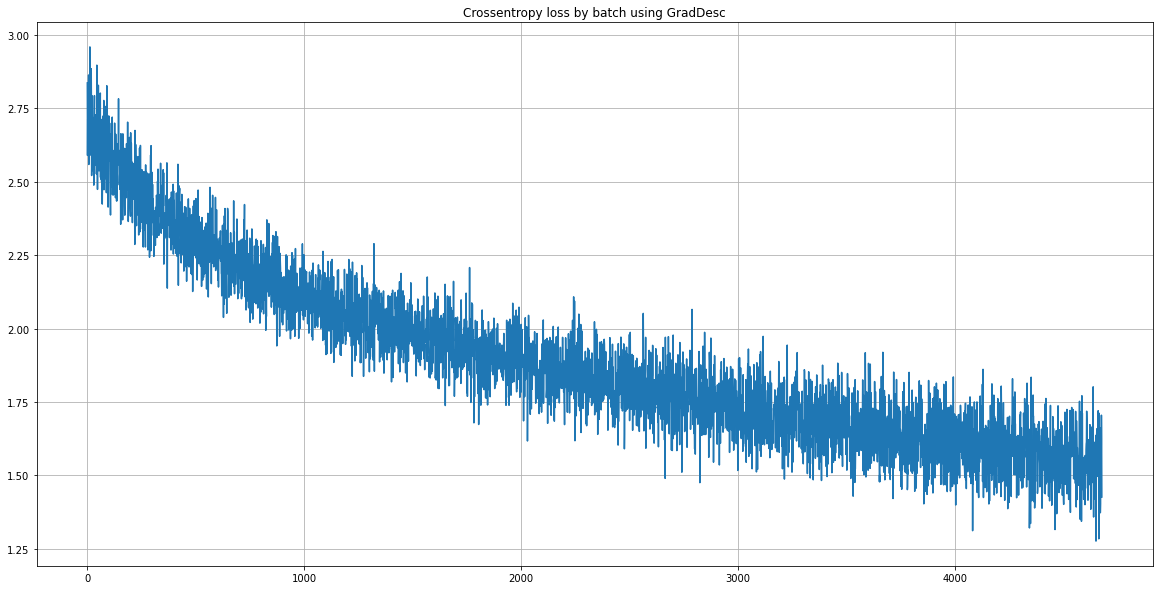

In [17]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using GradDesc")
plt.grid()
plt.plot(history_grad.flatten())

### Momentum

In [25]:
model_momentum = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=Momentum(learning_rate=0.0001, momentum=0.45),
    loss=Crossentropy,
    need_batch_normaliser=True
)
history_momentum = model_momentum.fit(10, 64, prepared_images, prepared_labels)

By epoch progress
Iter 1


469it [00:10, 42.94it/s]


Iter 2


469it [00:10, 44.55it/s]


Iter 3


469it [00:09, 47.92it/s]


Iter 4


469it [00:12, 38.53it/s]


Iter 5


469it [00:11, 42.50it/s]


Iter 6


469it [00:10, 46.07it/s]


Iter 7


469it [00:11, 40.15it/s]


Iter 8


469it [00:06, 69.02it/s]


Iter 9


469it [00:11, 40.01it/s]


Iter 10


469it [00:11, 39.58it/s]


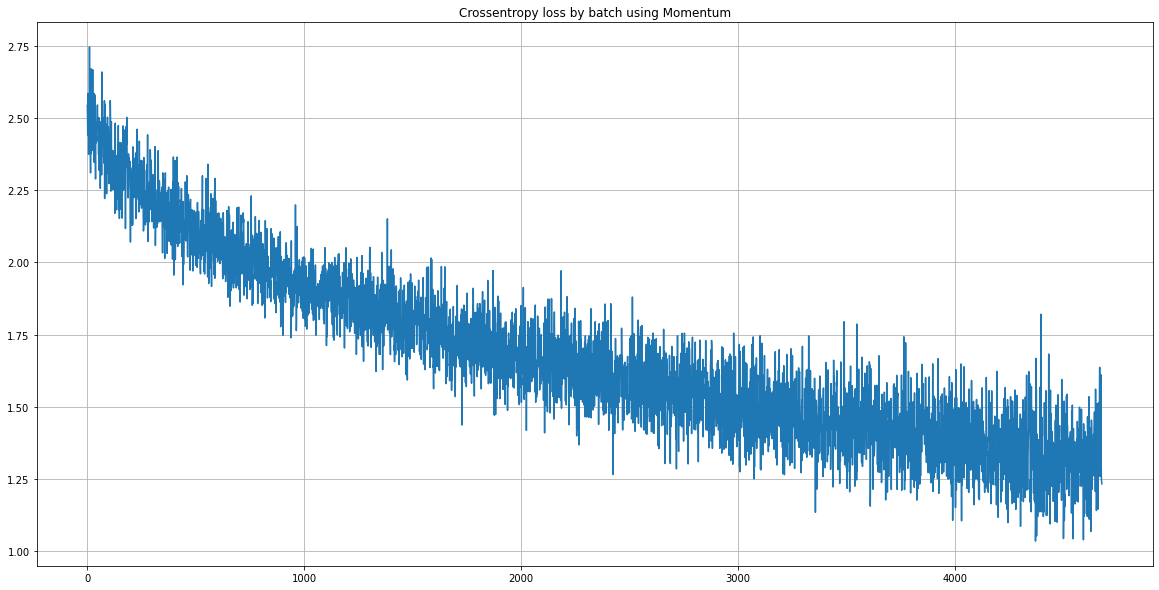

In [26]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using Momentum")
plt.grid()
plt.plot(history_momentum.flatten())

### Adagrad

In [12]:
model_adagrad = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=Adagrad(0.001),
    loss=Crossentropy,
    need_batch_normaliser=True
)
history_adagrad = model_adagrad.fit(5, 32, prepared_images, prepared_labels)

By epoch progress
Iter 1


938it [00:23, 39.56it/s]


Iter 2


938it [00:26, 34.87it/s]


Iter 3


938it [00:25, 36.83it/s]


Iter 4


938it [00:23, 39.18it/s]


Iter 5


938it [00:24, 38.38it/s]


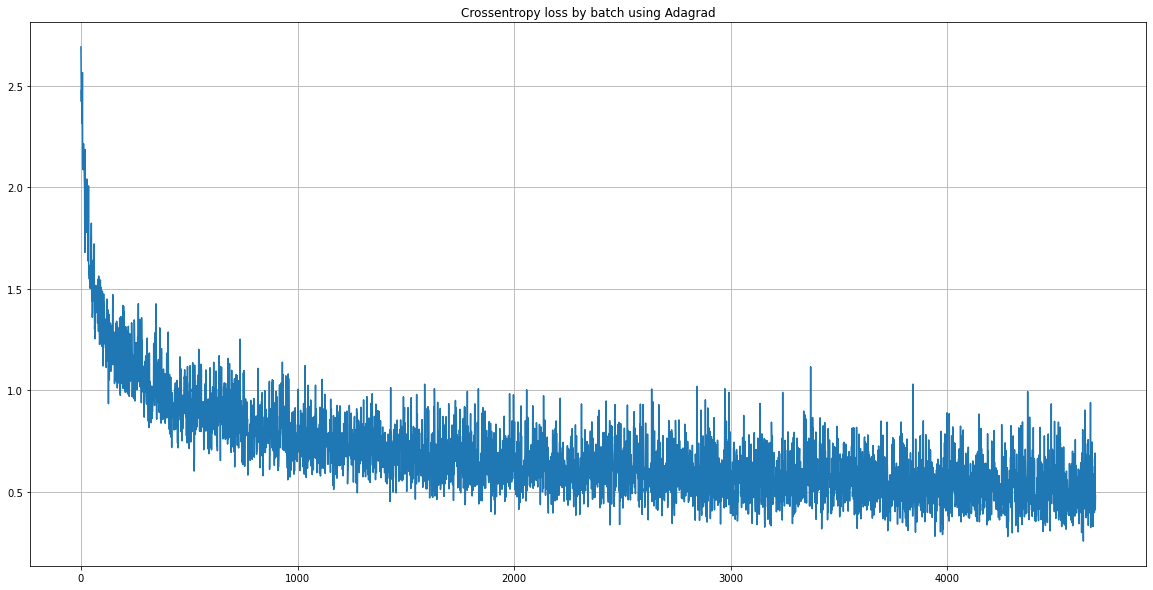

In [13]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using Adagrad")
plt.grid()
plt.plot(history_adagrad.flatten())

### RMSProp

In [18]:
model_rmsprop = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=RMSProp(0.05, momentum=0.9),
    loss=Crossentropy,
    need_batch_normaliser=True
)
history_rmsprop = model_rmsprop.fit(5, 32, prepared_images, prepared_labels)

By epoch progress
Iter 1


938it [00:21, 43.17it/s]


Iter 2


62it [00:00, 67.49it/s]/home/stepan/MIPT/second_sem/DeepLearning/handmade_nn/notebooks/../core/optimizers.py:72: RuntimeWarning: overflow encountered in add
  self.accum += self.m * self.accum + (1 - self.m) * np.power(error_der_matrix, 2)
679it [00:12, 55.89it/s]


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using RMSProp")
plt.grid()
plt.plot(history_rmsprop.flatten())

### Adam

In [10]:
model_adam = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=Adam(0.001, momentum_1=0.45, momentum_2=0.45),
    loss=Crossentropy,
    need_batch_normaliser=True
)
history_adam = model_adam.fit(5, 32, prepared_images, prepared_labels)

By epoch progress
Iter 1


938it [00:20, 45.27it/s]


Iter 2


938it [00:24, 39.07it/s]


Iter 3


938it [00:19, 46.93it/s]


Iter 4


938it [00:12, 75.37it/s]


Iter 5


938it [00:22, 42.51it/s]


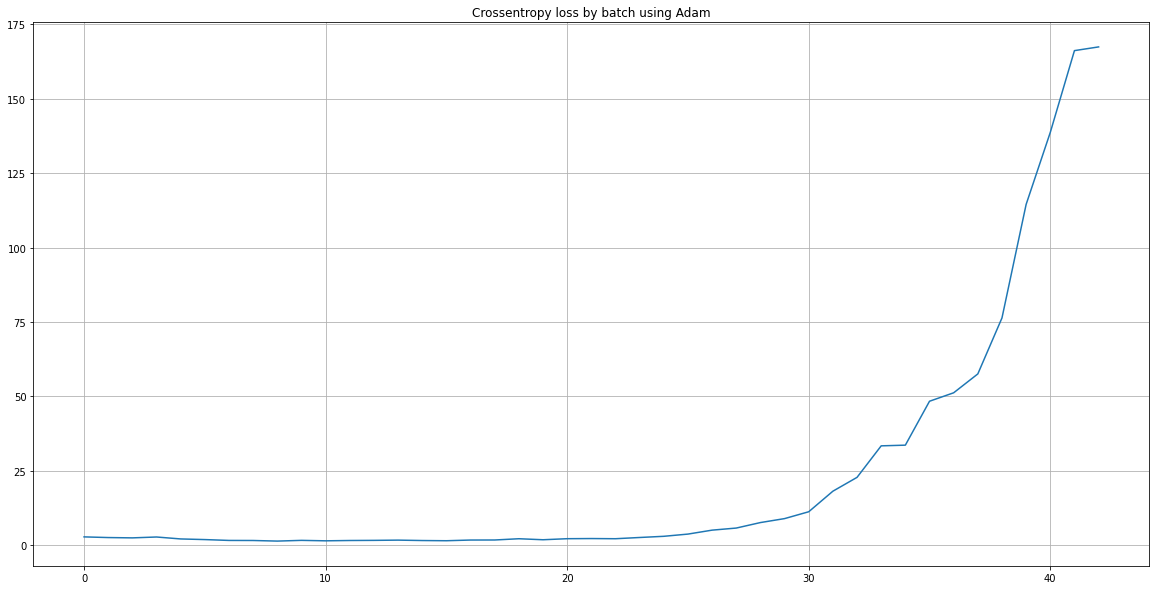

In [11]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using Adam")
plt.grid()
plt.plot(history_adam.flatten())